donnees entrainement => (120, 4)
donnees test =>  (30, 4)
(150, 4)
prediction [0 1 1 0 1 0 0 2 0 2 2 1 0 0 1 2 1 2 2 0 2 0 0 0 0 1 1 1 1 2 1 2 2 1 0 1 0
 1 2 1 2 1 2 1 1 1 2 1 0 2 0 0 1 0 0 2 1 0 2 0 2 1 0 0 2 1 1 0 0 2 1 1 0 1
 2 1 0 1 2 2 2 2 0 0 2 2 0 1 0 0 2 1 2 0 2 0 2 0 1 0 2 2 0 1 2 2 1 0 1 0 0
 1 2 0 2 0 1 2 2 1]
le score de KNN est 0.9333333333333333
le score de l'ADL est 0.9333333333333333
cross_val_score_KNN=> [1.         1.         1.         0.95833333 0.95833333]
cross_val_score_ADL=> [1.         1.         1.         0.95833333 1.        ]
 Moyene cross_val_score_KNN=> 0.9833333333333334
 Moyen cross_val_score_ADL=> 0.9916666666666668


c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neighbors\_base.py", line 516, in _fit
    self.n_neighbors
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selectio

meilleures score KNN => 0.9833333333333334
meilleures parametres KNN=> {'metric': 'euclidean', 'n_neighbors': 5}
meilleures score ADL => 0.9916666666666668
meilleures parametres ADL => {'solver': 'svd'}
score datatest KNN=> 0.9333333333333333
score datatest ADL=> 0.9333333333333333
data [19 38 57 76 96]


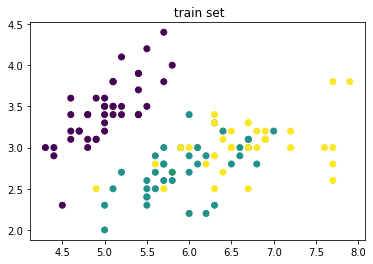

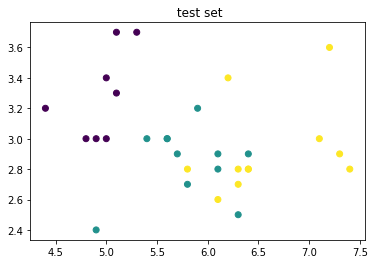

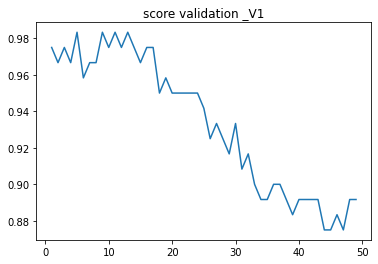

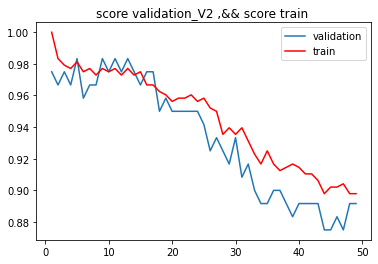

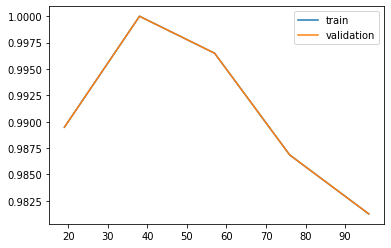

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import validation_curve 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
 
iris=load_iris()
x=iris.data 
y=iris.target 

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8, random_state=5) ##test size pour preciser la taille de partionemment
print("donnees entrainement =>",xtrain.shape) #random state pour fixer le melange de data afin d'avoir meme resultat
print("donnees test => ",xtest.shape)
print(x.shape)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)
plt.title(" train set")
fig1=plt.figure()
plt.scatter(xtest[:,0],xtest[:,1],c=ytest)
plt.title(" test set")

####entrainement sur un modele de kneighbors #####
modele=KNeighborsClassifier()
modele2=LinearDiscriminantAnalysis()
modele.fit(xtrain,ytrain)
modele2.fit(xtrain,ytrain)
print("prediction",modele.predict(xtrain))
print("le score de KNN est",modele.score(xtest,ytest))
print("le score de l'ADL est",modele2.score(xtest,ytest))

#####cross_validation ################
#ca consiste a decouper le train set en plusieures partie(train,validation=>splite)puis calculer les moyenes (K-flods)
#comparaison de modele #
print("cross_val_score_KNN=>",cross_val_score(KNeighborsClassifier(n_neighbors=5),xtrain,ytrain,cv=5))
print("cross_val_score_ADL=>",cross_val_score(LinearDiscriminantAnalysis(),xtrain,ytrain,cv=5))
print(" Moyene cross_val_score_KNN=>",cross_val_score(KNeighborsClassifier(n_neighbors=5),xtrain,ytrain,cv=5).mean())
print(" Moyen cross_val_score_ADL=>",cross_val_score(LinearDiscriminantAnalysis(),xtrain,ytrain,cv=5).mean())

################validation curve #################
#methode 1
liste_score=[]
for i in range(50):
    score=cross_val_score(KNeighborsClassifier(i),xtrain,ytrain,cv=5).mean()
    liste_score.append(score)

fig2=plt.figure()
plt.plot(liste_score)
plt.title("score validation _V1")

#metode2
k=np.arange(1,50)
train_score,val_score=validation_curve(KNeighborsClassifier(),xtrain,ytrain,'n_neighbors',k,cv=5) ##'n'neighbors' on designe le praramters qu'on  desire regler 
fig3=plt.figure() #k : nombre de paramatere qu'on veut tester 
plt.plot(k,val_score.mean(axis=1),label="validation")
plt.plot(k,train_score.mean(axis=1),c='r',label="train")
plt.legend()
plt.title("score validation_V2 ,&& score train ")

############### gridsearchCV ###############
k2=np.arange(1,50)
param_grid={'n_neighbors':k,
           'metric':['euclidean','manhattan']} ##selectionner paramatre qu'on veut verfier 
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(xtrain,ytrain)
print("meilleures score KNN =>",grid.best_score_) 
print("meilleures parametres KNN=>",grid.best_params_)

param_grid2={'solver':['svd','eigen','lsqr']}##selectionner parametre qu'on veut verifier 
grid2=GridSearchCV(LinearDiscriminantAnalysis(),param_grid2,cv=5)
grid2.fit(xtrain,ytrain)
print("meilleures score ADL =>",grid2.best_score_)
print("meilleures parametres ADL =>",grid2.best_params_)

mon_modele=grid.best_estimator_ ##sauvgarder le meilleure modele qu'on l'a eux et le faire teste sur datatest
mon_modele2=grid2.best_estimator_
print("score datatest KNN=>",mon_modele.score(xtest,ytest))
print("score datatest ADL=>",mon_modele2.score(xtest,ytest))




################### learning curve ################
#ca permet d'evoluer la performance du modele par la quantite d'information qu'il a 
K3,train_score2,val_score2=learning_curve(KNeighborsClassifier(),xtrain,ytrain,cv=5,train_sizes=np.linspace(0.2,1.0,5))
print("data",K3) ## data sets
fig5=plt.figure()
plt.plot(K3,train_score2.mean(axis=1),label='train')
plt.plot(K3,train_score2.mean(axis=1),label='validation')
plt.legend()



